# Importing libraries and Reading Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,jaccard_similarity_score,f1_score
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)

In [2]:
data=pd.read_csv('dataset.csv')
data.drop('customerID',axis=1,inplace=True)

In [3]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### **I have dropped CustomerID column as it's useless in Modeling**

In [47]:
data.isnull().sum()

gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7000 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              6896 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(4), object(16)
memory usage: 1.1+ MB


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### I have filled tenure with mean, but i will use dataset to predict SeniorCitizen values

In [4]:
ten_mean=data['tenure'].mean()

In [5]:
data['tenure']=data['tenure'].fillna(value=ten_mean)

# Label Encoding

In [6]:
encs = {}
for col in data.columns:
    if data[col].dtype == "object":
        encs[col] = LabelEncoder()
        data[col]   =encs[col].fit_transform(data[col])

# Standardization

In [7]:
sc=StandardScaler()
data['tenure']=sc.fit_transform(data['tenure'].values.reshape(-1,1))
data['MonthlyCharges']=sc.fit_transform(data['MonthlyCharges'].values.reshape(-1,1))
data['TotalCharges']=sc.fit_transform(data['TotalCharges'].values.reshape(-1,1))

#  Handling Missing values in SeniorCitizen by Choosing Best classifier to predict it's values

In [8]:
df=data.copy()

In [9]:
new_test=df[df['SeniorCitizen'].isnull()]

In [10]:
new_test.drop('SeniorCitizen',axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
X=df.drop('SeniorCitizen',axis=1)
y=df['SeniorCitizen']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression demo for SeniorCitizen

In [14]:
lg=LogisticRegression(random_state=0).fit(X_train,y_train)
lg_pred=lg.predict(X_test)

print(' Accuracy of Testing: ',round(accuracy_score(y_test,lg_pred),4)*100,'%','\n','Accuracy of training',
      round(lg.score(X_train,y_train),3)*100,'%')
print(confusion_matrix(y_test,lg_pred))
#print(classification_report(y_test,lg_pred))

 Accuracy of Testing:  83.81 % 
 Accuracy of training 84.2 %
[[1911   26]
 [ 348   25]]


# KNN demo for SeniorCitizen

In [16]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7523809523809524
2 :  0.8181818181818182
3 :  0.7917748917748918
4 :  0.8281385281385282
5 :  0.8225108225108225
6 :  0.8329004329004329
7 :  0.8233766233766234
8 :  0.8346320346320346
9 :  0.8354978354978355
10 :  0.8350649350649351
11 :  0.8337662337662337
12 :  0.8329004329004329
13 :  0.832034632034632
14 :  0.832034632034632
15 :  0.8316017316017316
16 :  0.835930735930736
17 :  0.8329004329004329
18 :  0.8363636363636363
19 :  0.8354978354978355
20 :  0.8363636363636363
21 :  0.8341991341991342
22 :  0.8363636363636363
23 :  0.8337662337662337
24 :  0.8376623376623377
25 :  0.835930735930736
26 :  0.835930735930736
27 :  0.8354978354978355
28 :  0.8350649350649351
29 :  0.8329004329004329
30 :  0.8333333333333334
31 :  0.8341991341991342
32 :  0.8341991341991342
33 :  0.8337662337662337
34 :  0.8367965367965368
35 :  0.8372294372294372
36 :  0.8398268398268398
37 :  0.8389610389610389
38 :  0.8389610389610389
39 :  0.8380952380952381
40 :  0.8393939393939394
41 :  0.838528

In [17]:
knn=KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print('Accuracy Score for KNN: ',round(accuracy_score(y_test,knn_pred),3)*100,'%')

Accuracy Score for KNN:  83.3 %


In [18]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))


[[1894   43]
 [ 343   30]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      1937
         1.0       0.41      0.08      0.13       373

   micro avg       0.83      0.83      0.83      2310
   macro avg       0.63      0.53      0.52      2310
weighted avg       0.78      0.83      0.78      2310



##### i choose KNN to predict missing values for SeniorCitizen

In [19]:
new_senior=knn.predict(new_test)

In [20]:
new_test['SeniorCitizen']=new_senior

In [21]:
new_test.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen
0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971,0,0.0
1,1,0,0,0.039732,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876,0,0.0
2,1,0,0,-1.286708,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399,1,0.0
3,1,0,0,0.495696,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400,0,0.0
4,0,0,0,-1.286708,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193,1,0.0


## Filling SeniorCitizen with predicted values

In [22]:
data['SeniorCitizen']=data['SeniorCitizen'].fillna(new_test['SeniorCitizen'])

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971,0
1,1,0.0,0,0,0.039732,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876,0
2,1,0.0,0,0,-1.286708,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399,1
3,1,0.0,0,0,0.495696,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400,0
4,0,0.0,0,0,-1.286708,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193,1


### Check for any missing values

In [30]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

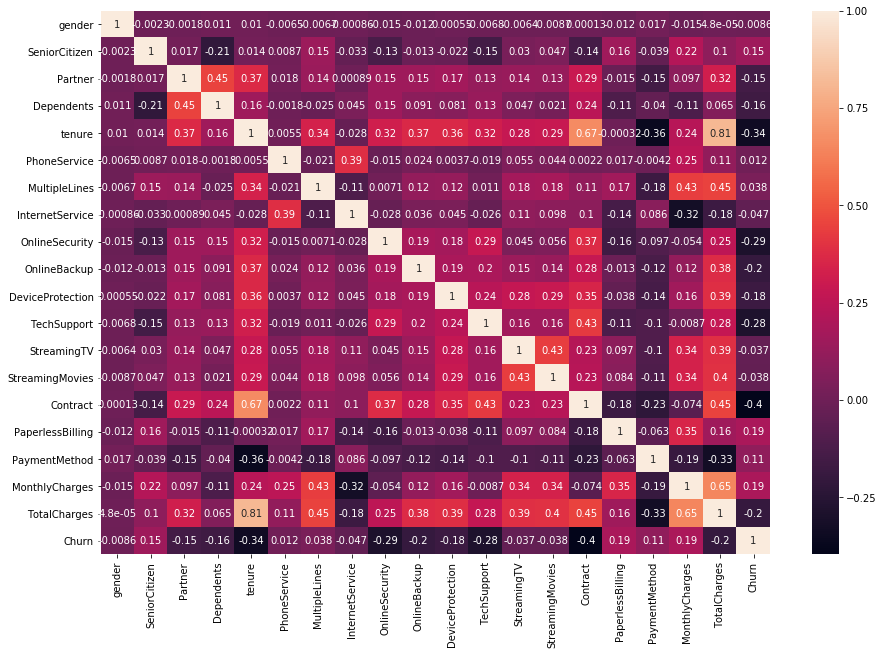

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

# Working with All data
- **Train/Test split for data.**
- **Feed models with training and testing data.**
- **Estimate Accuracy for models.**

In [23]:
X=data.drop('Churn',axis=1)
y=data['Churn']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression 

In [25]:
lg_model=LogisticRegression(C=0.01,solver='saga',max_iter=999999999).fit(X_train,y_train)
lg_prediction=lg_model.predict(X_test)
print(' Accuracy of Testing: ',round(accuracy_score(y_test,lg_prediction),4)*100,'%')
print(confusion_matrix(y_test,lg_prediction))
print(classification_report(y_test,lg_prediction))
#print(lg_model.score(X_train,y_train))

 Accuracy of Testing:  80.99 %
[[1563  134]
 [ 308  320]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1697
           1       0.70      0.51      0.59       628

   micro avg       0.81      0.81      0.81      2325
   macro avg       0.77      0.72      0.73      2325
weighted avg       0.80      0.81      0.80      2325



# Logistic Regression with Balanced weight for classes

In [26]:
lg_balanced=LogisticRegression(C=0.01,class_weight='balanced',solver='saga',max_iter=999999999).fit(X_train,y_train)
lg_pred_balanced=lg_balanced.predict(X_test)
print(' Accuracy of Testing: ',round(accuracy_score(y_test,lg_pred_balanced),4)*100,'%')
print(confusion_matrix(y_test,lg_pred_balanced))
print(classification_report(y_test,lg_pred_balanced))
#print(lg_model.score(X_train,y_train))

 Accuracy of Testing:  74.24 %
[[1209  488]
 [ 111  517]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1697
           1       0.51      0.82      0.63       628

   micro avg       0.74      0.74      0.74      2325
   macro avg       0.72      0.77      0.72      2325
weighted avg       0.81      0.74      0.76      2325



# KNN

In [33]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7217204301075268
2 :  0.7582795698924731
3 :  0.7552688172043011
4 :  0.7681720430107527
5 :  0.76
6 :  0.7617204301075269
7 :  0.7612903225806451
8 :  0.7668817204301075
9 :  0.7703225806451612
10 :  0.770752688172043
11 :  0.7741935483870968
12 :  0.7716129032258064
13 :  0.7776344086021505
14 :  0.7746236559139785
15 :  0.7845161290322581
16 :  0.7827956989247312
17 :  0.7870967741935484
18 :  0.7879569892473118
19 :  0.7879569892473118
20 :  0.786236559139785
21 :  0.7883870967741935
22 :  0.786236559139785
23 :  0.7870967741935484
24 :  0.7870967741935484
25 :  0.789247311827957
26 :  0.7905376344086021
27 :  0.7926881720430108
28 :  0.7939784946236559
29 :  0.7939784946236559
30 :  0.7965591397849462
31 :  0.7939784946236559
32 :  0.792258064516129
33 :  0.7935483870967742
34 :  0.7939784946236559
35 :  0.7896774193548387
36 :  0.7926881720430108
37 :  0.7931182795698924
38 :  0.7948387096774193
39 :  0.7948387096774193
40 :  0.7939784946236559
41 :  0.7944086021505377
42 

In [27]:
knn=KNeighborsClassifier(n_neighbors=26).fit(X_train,y_train)
knn_pred=knn.predict(X_test)

In [28]:
print(' Accuracy of Testing: ',round(accuracy_score(y_test,knn_pred),4)*100,'%')
print(confusion_matrix(y_test,knn_pred))

 Accuracy of Testing:  79.05 %
[[1523  174]
 [ 313  315]]


# Random Forest 

In [29]:
rfc=RandomForestClassifier().fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print('Accuracy Score : ',round(accuracy_score(y_test,rfc_pred),3)*100,'%')
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Accuracy Score :  78.5 %
[[1555  142]
 [ 358  270]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1697
           1       0.66      0.43      0.52       628

   micro avg       0.78      0.78      0.78      2325
   macro avg       0.73      0.67      0.69      2325
weighted avg       0.77      0.78      0.77      2325



# SVM 

In [30]:
svm=SVC().fit(X_train,y_train)
svm_pred=svm.predict(X_test)
print('Accuracy Score : ',round(accuracy_score(y_test,svm_pred),3)*100,'%')
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Accuracy Score :  80.5 %
[[1579  118]
 [ 336  292]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1697
           1       0.71      0.46      0.56       628

   micro avg       0.80      0.80      0.80      2325
   macro avg       0.77      0.70      0.72      2325
weighted avg       0.79      0.80      0.79      2325



# Decision Tree

In [31]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print('Accuracy Score : ',round(accuracy_score(y_test,dt_pred),3)*100,'%')
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

Accuracy Score :  73.5 %
[[1388  309]
 [ 306  322]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1697
           1       0.51      0.51      0.51       628

   micro avg       0.74      0.74      0.74      2325
   macro avg       0.66      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325



# Choosing best parameters for Random Forest Tree

In [41]:
grid_values={'n_estimators':[50,100,150,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_rf = GridSearchCV(rfc,param_grid=grid_values,scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
best_param=grid_rf.best_params_
best_param

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 20,
 'n_estimators': 100}

# Train Random Forest again after getting best parameters

In [32]:
rfc=RandomForestClassifier(max_depth=None,max_features='log2',min_samples_leaf=20,n_estimators=100).fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print('Accuracy Score : ',round(accuracy_score(y_test,rfc_pred),3)*100,'%')
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Accuracy Score :  80.60000000000001 %
[[1573  124]
 [ 326  302]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1697
           1       0.71      0.48      0.57       628

   micro avg       0.81      0.81      0.81      2325
   macro avg       0.77      0.70      0.72      2325
weighted avg       0.80      0.81      0.79      2325



# Naive Bayes

In [33]:
nb=GaussianNB().fit(X_train,y_train)
nb_pred=nb.predict(X_test)
print('Accuracy Score: ',round(accuracy_score(y_test,nb_pred),3)*100)
print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))

Accuracy Score:  75.6
[[1273  424]
 [ 143  485]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1697
           1       0.53      0.77      0.63       628

   micro avg       0.76      0.76      0.76      2325
   macro avg       0.72      0.76      0.72      2325
weighted avg       0.80      0.76      0.77      2325



In [34]:
Algorithm=['Logistic Regression','KNN','Random Forest','Blanced Weight LogisticR.','SVM','DecisionTree','NaiveBayes']
j_Log=round(jaccard_similarity_score(y_test,lg_prediction)*100,2)
j_knn=round(jaccard_similarity_score(y_test,knn_pred)*100,2)
j_rfc=round(jaccard_similarity_score(y_test,rfc_pred)*100,2)
j_balanced=round(jaccard_similarity_score(y_test,lg_pred_balanced)*100,2)
j_svm=round(jaccard_similarity_score(y_test,svm_pred)*100,2)
j_dt=round(jaccard_similarity_score(y_test,dt_pred)*100,2)
j_nb=round(jaccard_similarity_score(y_test,nb_pred)*100,2)


Jaccard=[j_Log,j_knn,j_rfc,j_balanced,j_svm,j_dt,j_nb]

f1_knn=f1_score(y_test,knn_pred,average=None)
f1_log=f1_score(y_test,lg_prediction,average=None)
f1_rfc=f1_score(y_test,rfc_pred,average=None)
f1_balanced=f1_score(y_test,lg_pred_balanced,average=None)
f1_svm=f1_score(y_test,svm_pred,average=None)
f1_dt=f1_score(y_test,dt_pred,average=None)
f1_nb=f1_score(y_test,nb_pred,average=None)

F1_score=[f1_log,f1_knn,f1_rfc,f1_balanced,f1_svm,f1_dt,f1_nb]

### I used **Jaccard similarity** and F1-Score to estimate Accuracy of Models
#####  **Jaccard Similarity coefficient score:**
<img src="gL3oV.jpg">

In [35]:
Models_Evaluation = pd.DataFrame({
    "Algorithm": Algorithm,
    "Jaccard Similarity": Jaccard,
    "F1-Score": F1_score})

In [36]:
Models_Evaluation

,Algorithm,Jaccard Similarity,F1-Score
0,Logistic Regression,80.99,"[0.8761210762331838, 0.5914972273567468]"
1,KNN,79.05,"[0.8621568072459665, 0.5640107430617726]"
2,Random Forest,80.65,"[0.8748609566184651, 0.5730550284629982]"
3,Blanced Weight LogisticR.,74.24,"[0.8014584023864767, 0.633190447030006]"
4,SVM,80.47,"[0.8743078626799556, 0.5626204238921002]"
5,DecisionTree,73.55,"[0.8186375700383367, 0.5115170770452739]"
6,NaiveBayes,75.61,"[0.817860584645037, 0.631099544567339]"


### After test models i can see that model is biased and classifiy most data in the first class(0), so i started searching for the problem of (Iimbalanced classes), and i have found that imblearn provided and algorithm called SMOTE (Synthetic Minority Over-sampling Technique),  and i will try to optimize algorithms (KNN, SVM,... etc.) using that algorithm and optimize precision  and recall of these algorithms.

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# Logistic Regression +SMOTE

In [69]:
lg_sm=LogisticRegression().fit(X_train_res,y_train_res)
new_lg=lg_sm.predict(X_test)
print('Accuracy Score AFter SMOTE :',accuracy_score(y_test,new_lg)*100)
print(confusion_matrix(y_test,new_lg))
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,lg_prediction))
print("After Using SMOTE",'\n')
print(classification_report(y_test,new_lg))

Accuracy Score AFter SMOTE : 74.58064516129032
[[1220  477]
 [ 114  514]]
BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1697
           1       0.70      0.51      0.59       628

   micro avg       0.81      0.81      0.81      2325
   macro avg       0.77      0.72      0.73      2325
weighted avg       0.80      0.81      0.80      2325

After Using SMOTE 

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1697
           1       0.52      0.82      0.63       628

   micro avg       0.75      0.75      0.75      2325
   macro avg       0.72      0.77      0.72      2325
weighted avg       0.81      0.75      0.76      2325



# KNN + SMOTE

In [136]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train_res,y_train_res)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.701505376344086
2 :  0.7294623655913979
3 :  0.6894623655913978
4 :  0.7182795698924731
5 :  0.6855913978494623
6 :  0.715268817204301
7 :  0.6886021505376344
8 :  0.7126881720430107
9 :  0.690752688172043
10 :  0.7161290322580646
11 :  0.690752688172043
12 :  0.7075268817204301
13 :  0.6911827956989247
14 :  0.7083870967741935
15 :  0.693763440860215
16 :  0.7053763440860215
17 :  0.6894623655913978
18 :  0.7002150537634408
19 :  0.6817204301075269
20 :  0.6941935483870968
21 :  0.6812903225806451
22 :  0.6929032258064516
23 :  0.683010752688172
24 :  0.6920430107526881
25 :  0.6855913978494623
26 :  0.6972043010752688
27 :  0.6881720430107527
28 :  0.693763440860215
29 :  0.6916129032258065
30 :  0.6924731182795699
31 :  0.6920430107526881
32 :  0.6997849462365592
33 :  0.6954838709677419
34 :  0.701505376344086
35 :  0.6972043010752688
36 :  0.701505376344086
37 :  0.693763440860215
38 :  0.6980645161290323
39 :  0.6933333333333334
40 :  0.7002150537634408
41 :  0.69720430107

In [56]:
knn_smo=KNeighborsClassifier(n_neighbors=6).fit(X_train_res,y_train_res)
new_knn=knn_smo.predict(X_test)
print('Accuracy score after SMOTE',accuracy_score(y_test,new_knn)*100)
print(confusion_matrix(y_test,new_knn),'\n')
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,knn_pred))
print("After Using SMOTE",'\n')
print(classification_report(y_test,new_knn))

Accuracy score after SMOTE 71.5268817204301
[[1232  465]
 [ 197  431]] 

BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1697
           1       0.64      0.50      0.56       628

   micro avg       0.79      0.79      0.79      2325
   macro avg       0.74      0.70      0.71      2325
weighted avg       0.78      0.79      0.78      2325

After Using SMOTE 

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1697
           1       0.48      0.69      0.57       628

   micro avg       0.72      0.72      0.72      2325
   macro avg       0.67      0.71      0.68      2325
weighted avg       0.76      0.72      0.73      2325



# Random Forest +SMOTE

In [58]:
rfc_smo=RandomForestClassifier(max_depth=15,max_features='log2',min_samples_leaf=1,n_estimators=200).fit(X_train_res,y_train_res)
new_rfc=rfc_smo.predict(X_test)
print('Accuracy score After SMOTE IS: ',accuracy_score(y_test,new_rfc)*100)
print(confusion_matrix(y_test,new_rfc),'\n')
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,rfc_pred))
print("After Using SMOTE",'\n')
print(classification_report(y_test,new_rfc))

Accuracy score After SMOTE IS:  78.66666666666666
[[1434  263]
 [ 233  395]] 

BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1697
           1       0.69      0.48      0.57       628

   micro avg       0.80      0.80      0.80      2325
   macro avg       0.76      0.70      0.72      2325
weighted avg       0.79      0.80      0.79      2325

After Using SMOTE 

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1697
           1       0.60      0.63      0.61       628

   micro avg       0.79      0.79      0.79      2325
   macro avg       0.73      0.74      0.73      2325
weighted avg       0.79      0.79      0.79      2325



In [143]:
grid_values={'n_estimators':[50,100,150,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_rf = GridSearchCV(rfc_smo,param_grid=grid_values,scoring='accuracy')
grid_rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [144]:
grid_rf.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 200}

# Decision Tree +SMOTE

In [60]:
dt_smo=DecisionTreeClassifier().fit(X_train_res,y_train_res)
new_dt=dt_smo.predict(X_test)
print(accuracy_score(y_test,new_dt))
print(confusion_matrix(y_test,new_dt),'\n')
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,dt_pred))
print("After Using SMOTE",'\n')
print(classification_report(y_test,new_dt))

0.7470967741935484
[[1390  307]
 [ 281  347]] 

BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1697
           1       0.51      0.51      0.51       628

   micro avg       0.74      0.74      0.74      2325
   macro avg       0.67      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325

After Using SMOTE 

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1697
           1       0.53      0.55      0.54       628

   micro avg       0.75      0.75      0.75      2325
   macro avg       0.68      0.69      0.68      2325
weighted avg       0.75      0.75      0.75      2325



# SVM +SMOTE

In [70]:
svm_smo=SVC(kernel='rbf').fit(X_train_res,y_train_res)
new_svm=svm_smo.predict(X_test)
print(accuracy_score(y_test,new_svm))
print(confusion_matrix(y_test,new_svm),'\n')
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,svm_pred))
print("After Using SMOTE",'\n')
print(classification_report(y_test,new_svm))

0.7462365591397849
[[1232  465]
 [ 125  503]] 

BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1697
           1       0.71      0.46      0.56       628

   micro avg       0.80      0.80      0.80      2325
   macro avg       0.77      0.70      0.72      2325
weighted avg       0.79      0.80      0.79      2325

After Using SMOTE 

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1697
           1       0.52      0.80      0.63       628

   micro avg       0.75      0.75      0.75      2325
   macro avg       0.71      0.76      0.72      2325
weighted avg       0.80      0.75      0.76      2325



# Naive Bayes +SMOTE

In [74]:
nb_smo=GaussianNB().fit(X_train_res,y_train_res)
nb_dt=nb_smo.predict(X_test)
print(accuracy_score(y_test,nb_dt))
print(confusion_matrix(y_test,nb_dt),'\n')
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,nb_pred))
print("BEfore Using SMOTE",'\n')
print(classification_report(y_test,nb_dt))

0.7389247311827957
[[1202  495]
 [ 112  516]] 

BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1697
           1       0.53      0.77      0.63       628

   micro avg       0.76      0.76      0.76      2325
   macro avg       0.72      0.76      0.72      2325
weighted avg       0.80      0.76      0.77      2325

BEfore Using SMOTE 

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1697
           1       0.51      0.82      0.63       628

   micro avg       0.74      0.74      0.74      2325
   macro avg       0.71      0.76      0.71      2325
weighted avg       0.81      0.74      0.75      2325



# Over Sampling using RandomOverSampler

In [41]:
overSample = RandomOverSampler(random_state=10)
X_over, y_over = overSample.fit_resample(X, y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=42)

# Logistic Regression + RandomOverSampler

In [78]:
lg_over=LogisticRegression().fit(X_train,y_train)
new_lg_over=lg_over.predict(X_test)
print('Accuracy Score AFter RandomOverSampler :',accuracy_score(y_test,new_lg_over)*100)
print(confusion_matrix(y_test,new_lg_over))
print(classification_report(y_test,new_lg_over))
print('Train ACC.:',lg_over.score(X_train,y_train))

Accuracy Score AFter RandomOverSampler : 76.95461200585652
[[1273  457]
 [ 330 1355]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1730
           1       0.75      0.80      0.77      1685

   micro avg       0.77      0.77      0.77      3415
   macro avg       0.77      0.77      0.77      3415
weighted avg       0.77      0.77      0.77      3415

Train ACC.: 0.7575364200201933


# KNN + RandomOverSampler

In [82]:
knn_over=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
new_knn_over=knn_over.predict(X_test)
print('Accuracy score after RandomOverSampler',accuracy_score(y_test,new_knn_over)*100)
print(confusion_matrix(y_test,new_knn_over),'\n')
print(classification_report(y_test,new_knn_over))
print('Train ACC.:',knn_over.score(X_train,y_train))

Accuracy score after RandomOverSampler 76.54465592972181
[[1198  532]
 [ 269 1416]] 

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1730
           1       0.73      0.84      0.78      1685

   micro avg       0.77      0.77      0.77      3415
   macro avg       0.77      0.77      0.76      3415
weighted avg       0.77      0.77      0.76      3415

Train ACC.: 0.8257608538872061


# Random Forest+ RandomOverSampler

In [63]:
rfc_over=RandomForestClassifier(max_depth=14,max_features='log2',min_samples_leaf=1,n_estimators=50).fit(X_train,y_train)
new_rfc_over=rfc_over.predict(X_test)
print('Accuracy score After RandomOverSampler: ',accuracy_score(y_test,new_rfc_over)*100)
print(confusion_matrix(y_test,new_rfc_over),'\n')
print(classification_report(y_test,new_rfc_over))
print('Train ACC.:',rfc_over.score(X_train,y_train))

Accuracy score After RandomOverSampler:  87.61346998535872
[[1391  339]
 [  84 1601]] 

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1730
           1       0.83      0.95      0.88      1685

   micro avg       0.88      0.88      0.88      3415
   macro avg       0.88      0.88      0.88      3415
weighted avg       0.88      0.88      0.88      3415

0.9701427953266984


# Decision Tree + RandomOverSampler

In [71]:
dt_over=DecisionTreeClassifier(min_samples_leaf=4).fit(X_train,y_train)
new_dt_over=dt_over.predict(X_test)
print('Decision Tree Accuracy After RandomOverSampler',round(accuracy_score(y_test,new_dt_over)*100,2))
print(confusion_matrix(y_test,new_dt_over),'\n')
print(classification_report(y_test,new_dt_over))
print('Train ACC.: ',dt_over.score(X_train,y_train))

Decision Tree Accuracy After RandomOverSampler 80.32
[[1370  360]
 [ 312 1373]] 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1730
           1       0.79      0.81      0.80      1685

   micro avg       0.80      0.80      0.80      3415
   macro avg       0.80      0.80      0.80      3415
weighted avg       0.80      0.80      0.80      3415

Train ACC.:  0.9112938122025097


# SVM (Poly kernel)+ RandomOverSampler

In [83]:
svm_over=SVC(kernel='poly').fit(X_train,y_train)
new_svm_over=svm_over.predict(X_test)
print("Accuracy After RandomOverSampler",round(accuracy_score(y_test,new_svm_over)*100,2))
print(confusion_matrix(y_test,new_svm_over),'\n')
print(classification_report(y_test,new_svm_over))
print('Train ACC.:',svm_over.score(X_train,y_train))

Accuracy After RandomOverSampler 77.63
[[1242  488]
 [ 276 1409]] 

              precision    recall  f1-score   support

           0       0.82      0.72      0.76      1730
           1       0.74      0.84      0.79      1685

   micro avg       0.78      0.78      0.78      3415
   macro avg       0.78      0.78      0.78      3415
weighted avg       0.78      0.78      0.78      3415

Train ACC.: 0.7771527477282562


# Naive Bayes + RandomOverSampler

In [84]:
nb_over=GaussianNB().fit(X_train,y_train)
nb_dt_over=nb_over.predict(X_test)
print('Accuracy of NB After RandomOverSampler',round(accuracy_score(y_test,nb_dt_over)*100,2))
print(confusion_matrix(y_test,nb_dt_over),'\n')
print(classification_report(y_test,nb_dt_over))
print('Train ACC.:',nb_over.score(X_train,y_train))

Accuracy of NB After RandomOverSampler 75.84
[[1250  480]
 [ 345 1340]] 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1730
           1       0.74      0.80      0.76      1685

   micro avg       0.76      0.76      0.76      3415
   macro avg       0.76      0.76      0.76      3415
weighted avg       0.76      0.76      0.76      3415

Train ACC.: 0.7496033463147267


### Refrences:
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
- https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail
- https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#smote-adasyn
- https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
- https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
- https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data